<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_R/blob/main/Colab_Notebook/02_07_02_02_survival_analysis_time_dependent_covariates_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![All-test](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 2.2  Survival Analysis with Time-Dependent Covariates


This tutorial explains the concept of **time-dependent covariates** in survival analysis, why they are important, how to implement them, and the assumptions involved. It also provides practical examples and code snippets in R.


##  Overview


**Time-dependent covariates** (also called **time-varying covariates**) are predictor variables whose values **change over time** during the follow-up period of a survival study.


###  Examples in Practice:


- **Medical**: Blood pressure, CD4 count, treatment status (started/stopped during study)
- **Engineering**: Temperature, stress levels, maintenance status of equipment
- **Economics**: Employment status, income level, policy changes
- **Social Sciences**: Marital status, education level, behavioral changes


### Standard vs. Time-Dependent Approach:


| Standard Survival Analysis | Time-Dependent Survival Analysis |
|---------------------------|----------------------------------|
| Uses **baseline values only** | Uses **current values at time t** |
| Assumes covariates are fixed | Allows covariates to evolve |
| May introduce **bias** if values change | Provides **more accurate risk assessment** |



### Why Do We Need Time-Dependent Covariates?


-  Problem with Fixed Covariates:
Imagine studying the effect of **blood pressure** on heart attack risk:
- Patient A has BP = 120/80 at baseline but develops hypertension (160/100) after 6 months
- Standard analysis would still classify them as "low risk" based on baseline
- **Reality**: Their risk increased when BP rose

-  Solution:
Time-dependent covariates allow the **hazard at time t** to depend on the **current value** of the covariate at that exact time.



###  Mathematical Framework


`Standard Cox Model`:

$$
h(t \mid X) = h_0(t) \exp(\beta X)
$$
Where $X$ is **fixed** for each subject.

`Cox Model with Time-Dependent Covariates`:

$$
h(t \mid X(t)) = h_0(t) \exp(\beta X(t))
$$
Where $X(t)$ is the **value of the covariate at time t**.


The hazard ratio compares two individuals **at the same time point t**, using their **current covariate values** at that time.



### Data Structure: Start-Stop Format


To implement time-dependent covariates, data must be structured in **"start-stop"** (or **counting process**) format:

| ID | tstart | tstop | event | covariate |
|----|--------|-------|-------|-----------|
| 1  | 0      | 30    | 0     | 0         |
| 1  | 30     | 75    | 1     | 1         |
| 2  | 0      | 45    | 0     | 0         |
| 2  | 45     | 120   | 0     | 1         |


### Rules:


- Each row represents a **time interval** `[tstart, tstop)`
- Covariate values are **constant within each interval**
- **Event** occurs at the end of the interval where `event = 1`
- Multiple rows per subject are allowed



###  Implementation Approaches

### 1. **True Time-Dependent Covariates**


- Covariate values **actually change** during follow-up
- Example: Lab measurements, treatment initiation
- Requires **data restructuring** into start-stop format


### 2. **Time-Transformed Covariates** (for PH violation)


- Create interaction terms like `covariate × log(time)`
- Used when proportional hazards assumption is violated
- Doesn't require new data structure


### 3. **Cumulative Covariates**


- Use running averages or cumulative exposure
- Example: Total drug dose received up to time t



###  Important Assumptions and Considerations

###  Valid Assumptions:

- **No future knowledge**: Covariate at time t depends only on information available at or before t
- **Accurate timing**: Change points are recorded precisely
- **PH assumption**: Still applies to the **time-dependent coefficients**


###  Common Pitfalls:

#### 1. **Immortal Time Bias**

- **Wrong**: Assign treatment status based on future events
- **Right**: Treatment status can only change based on past/current information


#### 2. **Informative Censoring**

- If covariate measurement stops when patient deteriorates, this creates bias
- Missing data should be handled appropriately (e.g., last observation carried forward)


#### 3. **Over-splitting**

- Too many intervals can lead to computational issues
- Balance between accuracy and practicality


## Practical Example

### Scenario: Cancer Treatment Study


- Patients may **start chemotherapy** during follow-up
- We want to estimate the effect of **being on chemo at time t**


### Data Structure:

| Patient | tstart | tstop | Death | Chemo |
|---------|--------|-------|-------|-------|
| A       | 0      | 60    | 0     | 0     |
| A       | 60     | 120   | 1     | 1     |
| B       | 0      | 90    | 0     | 0     |
| B       | 90     | 180   | 0     | 1     |


### Interpretation:

- Hazard ratio for chemo represents the **instantaneous risk** of death for someone **currently on chemo** vs. **currently not on chemo**, at the same time point



### When NOT to Use Time-Dependent Covariates


1. **When covariates are truly fixed** (e.g., genetic markers, sex, baseline age)
2. **When change points are unknown or poorly recorded**
3. **When the primary interest is baseline risk prediction** rather than dynamic risk assessment


### Advantages and Benefits

### Advantages:


- **More realistic modeling** of real-world processes
- **Reduced bias** from misclassifying time-varying exposures
- **Better risk prediction** for clinical decision-making
- **Handles treatment switching** in clinical trials


### Applications:

- **Clinical research**: Treatment effects, biomarker dynamics
- **Reliability engineering**: Maintenance effects, wear-and-tear
- **Economics**: Policy impact assessment
- **Epidemiology**: Behavioral risk factor changes



## Setup R in Python Runtype - Install {rpy2}
{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp312-cp312-linux_x86_64.whl size=316564 sha256=891d7f3be439668832cd35f7254577459393c0ceef69dc7df78161010f80df20
  Stored in directory: /root/.cache/pip/wheels/00/26/d5/d5e8c0b039915e785be870270e4a9263e5058168a03513d8cc
Successfully built rpy2


## Mount Google Drive

In [ ]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Survival Analysis with Time-Dependent Covariates


This tutorial uses real data from the Primary Biliary Cirrhosis (PBC) study and demonstrates how to handle time-dependent covariates using the `tmerge()` function in R.



### Install Required R Packages


Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:


In [ ]:
%%R
packages <-c(
		 'tidyverse',
		 'performance',
		 'gtsummary',
		 'survival',
		 'survminer',
		 'ggsurvfit',
		 'tidycmprsk',
		 'ggfortify',
		 'timereg',
		 'cmprsk',
		 'condSURV',
		 'riskRegression',
		 'joineR'
		 )


### Install missing packages

In [ ]:
%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')
devtools::install_github("ItziarI/WeDiBaDis")

### Verify Installation

In [ ]:
%%R
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method        from 
  nobs.multinom broom



     tidyverse    performance      gtsummary       survival      survminer 
          TRUE           TRUE           TRUE           TRUE           TRUE 
     ggsurvfit     tidycmprsk      ggfortify        timereg         cmprsk 
          TRUE           TRUE           TRUE           TRUE           TRUE 
      condSURV riskRegression         joineR 
          TRUE           TRUE           TRUE 


### Load Packages

In [ ]:
%%R
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

In [ ]:
%%R
.libPaths('drive/My Drive/R')
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])

Successfully loaded packages:
 [1] "package:joineR"         "package:riskRegression" "package:condSURV"      
 [4] "package:cmprsk"         "package:timereg"        "package:ggfortify"     
 [7] "package:tidycmprsk"     "package:ggsurvfit"      "package:survminer"     
[10] "package:ggpubr"         "package:survival"       "package:gtsummary"     
[13] "package:performance"    "package:lubridate"      "package:forcats"       
[16] "package:stringr"        "package:dplyr"          "package:purrr"         
[19] "package:readr"          "package:tidyr"          "package:tibble"        
[22] "package:ggplot2"        "package:tidyverse"      "package:tools"         
[25] "package:stats"          "package:graphics"       "package:grDevices"     
[28] "package:utils"          "package:datasets"       "package:methods"       
[31] "package:base"          


### Data


We'll use the **Stanford Heart Transplant** dataset (built into the survival package as `heart`). This dataset tracks patients waiting for heart transplants. Key features:

* It includes time-dependent covariates like `transplant` (0 = no transplant, 1 = transplant received, which changes over time for some patients).
* The data is already in counting process format: each row represents an interval with `start` (start time of interval), `stop` (end time of interval), and event (1 if event occurred at end of interval, 0 otherwise).
* Other covariates: `age` (age at entry), `year` (year of acceptance), `surgery` (prior surgery: 0/1).
* Event: `Death` or `censoring`.
* There are 103 observations from 69 patients (some have multiple rows due to time-dependent changes).

This dataset is ideal because the transplant status is time-dependent—patients start without a transplant, and some receive one later, splitting their survival time into pre- and post-transplant intervals.


In [ ]:
%%R
data(heart, package = "survival")
head(heart)

  start stop event        age      year surgery transplant id
1     0   50     1 -17.155373 0.1232033       0          0  1
2     0    6     1   3.835729 0.2546201       0          0  2
3     0    1     0   6.297057 0.2655715       0          0  3
4     1   16     1   6.297057 0.2655715       0          1  3
5     0   36     0  -7.737166 0.4900753       0          0  4
6    36   39     1  -7.737166 0.4900753       0          1  4


In [ ]:
%%R
# Load the pbcseq dataset
data(pbcseq)
# Inspect pbcseq
head(pbcseq)

  id futime status trt      age sex day ascites hepato spiders edema bili chol
1  1    400      2   1 58.76523   f   0       1      1       1     1 14.5  261
2  1    400      2   1 58.76523   f 192       1      1       1     1 21.3   NA
3  2   5169      0   1 56.44627   f   0       0      1       1     0  1.1  302
4  2   5169      0   1 56.44627   f 182       0      1       1     0  0.8   NA
5  2   5169      0   1 56.44627   f 365       0      1       1     0  1.0   NA
6  2   5169      0   1 56.44627   f 768       0      1       1     0  1.9   NA
  albumin alk.phos   ast platelet protime stage
1    2.60     1718 138.0      190    12.2     4
2    2.94     1612   6.2      183    11.2     4
3    4.14     7395 113.5      221    10.6     3
4    3.60     2107 139.5      188    11.0     3
5    3.55     1711 144.2      161    11.6     3
6    3.92     1365 144.2      122    10.6     3


### Prepare Data for Time-Dependent Analysis


The `heart` data is already in the required format for time-dependent Cox models:

* Use `Surv(start, stop, event)` in the model formula to handle intervals.
* This format allows the model to account for covariate changes at specific times.

If your own data isn't in this format, you'd need to reshape it using functions like `tmerge()` from the survival package to create start-stop intervals based on time-varying covariates.

The `tmerge()` function is used to create a dataset suitable for time-dependent Cox models by merging baseline data with time-varying covariate data.
For example, if you had a long-format dataset with time points where covariates change, `tmerge()` can merge baseline data with time-dependent data:



#### Hypothetical example (not needed for 'heart')

tdc_data <- tmerge(data1 = baseline, data2 = time_dep, id = id, tstart = 0, tstop = time)



### Fit Cox Model with Time-Dependent Covariates


The Cox proportional hazards model extends to time-dependent covariates naturally in the counting process format. Fit a model including fixed covariates (`age`, `surgery`) and time-dependent (`transplant`):



In [ ]:
%%R
# Fit the Cox model
cox_model <- coxph(Surv(start, stop, event) ~ age + surgery + transplant, data = heart)
# Print summary
summary(cox_model)

Call:
coxph(formula = Surv(start, stop, event) ~ age + surgery + transplant, 
    data = heart)

  n= 172, number of events= 75 

                coef exp(coef) se(coef)      z Pr(>|z|)  
age          0.03054   1.03101  0.01389  2.198   0.0279 *
surgery     -0.77333   0.46147  0.35967 -2.150   0.0315 *
transplant1  0.01610   1.01623  0.30859  0.052   0.9584  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            exp(coef) exp(-coef) lower .95 upper .95
age            1.0310     0.9699     1.003    1.0595
surgery        0.4615     2.1670     0.228    0.9339
transplant1    1.0162     0.9840     0.555    1.8606

Concordance= 0.6  (se = 0.036 )
Likelihood ratio test= 10.72  on 3 df,   p=0.01
Wald test            = 9.68  on 3 df,   p=0.02
Score (logrank) test = 10  on 3 df,   p=0.02




**Interpretation**

`age`: Positive coefficient means older age increases hazard (risk of death) by about 3% per year (exp(coef) ≈ 1.03).
`surgery`: Negative coefficient  indicates prior surgery reduces hazard by about 66% (exp(coef) ≈ 0.34), significant (p=0.012).
`transplant`: Not significant but negative coef suggests transplant might slightly reduce hazard.

The model accounts for transplant changing over time.


### Proportional Hazards Assumption


Check proportional hazards assumption (should be non-significant for validity):


In [ ]:
%%R
cox.zph(cox_model)

            chisq df    p
age        0.8954  1 0.34
surgery    0.0968  1 0.76
transplant 0.1283  1 0.72
GLOBAL     1.3793  3 0.71



If `p-values` are low, the assumption may be violated—consider stratifying or extending the model.


### Model Diagnostics and Interpretation


* `Hazard Ratios`: From `exp(coef)`, interpret as multiplicative effect on hazard rate.
* `Confidence Intervals`: Use `confint(cox_model)`.
* `Predict Survival`: For new data, use `survfit(cox_model, newdata = ...)`.

For time-dependent models, predictions are trickier because survival curves depend on when the covariate changes. You can simulate scenarios:


In [ ]:
%%R
# Hypothetical new patient: age 0 (mean), no surgery, transplant at day 50
new_data <- data.frame(start = c(0, 50),
                       stop = c(50, Inf),
                       event = 0,
                       age = 0,
                       surgery = 0,
                       transplant = c(0, 1))
# But for prediction, use survfit with type="surv"

### Estimate Cumulative Baseline Hazard


The `basehaz()` function extracts the cumulative baseline hazard function $ H_0(t $. By default, it assumes covariates are centered (mean = 0 for continuous covariates like age).



In [ ]:
%%R
# Estimate cumulative baseline hazard
baseline_hazard <- basehaz(cox_model, centered = TRUE)
# View the first few rows
head(baseline_hazard)

      hazard time
1 0.01028146  1.0
2 0.04162004  2.0
3 0.07395244  3.0
4 0.07395244  4.0
5 0.07395244  4.5
6 0.09610416  5.0



* `Interpretation`: $ H_0(t) $ is the expected number of events (e.g., deaths) by time $ t $ for a reference individual (covariates = 0). For example, at time = 15, if hazard = 0.040615, the cumulative risk of the event is low for the baseline group.

* `Time-Dependent Covariates`: The transplant covariate’s time-dependent nature is handled in the model’s likelihood, so the baseline hazard assumes transplant = 0 (no transplant) unless specified otherwise.

* `Relation to Survival`: The baseline survival function is $S_0(t) = \exp(-H_0(t))$. We can compute this if needed.


To visualize $H_0(t)$, we can plot it against time using ggplot2 for clarity. The cumulative hazard typically increases over time, with steps at each event.


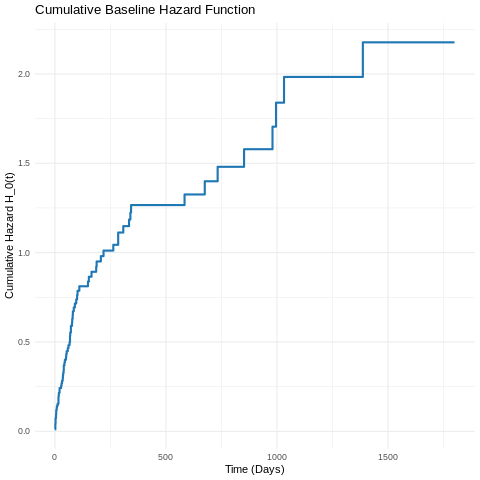

In [ ]:
%%R
# Plot cumulative baseline hazard
ggplot(baseline_hazard, aes(x = time, y = hazard)) +
  geom_step(color = "#1F77B4", size = 1) +
  labs(title = "Cumulative Baseline Hazard Function",
       x = "Time (Days)",
       y = "Cumulative Hazard H_0(t)") +
  theme_minimal()

### Compute Baseline Survival


If you want the baseline survival function $S_0(t) = \exp(-H_0(t)) $:


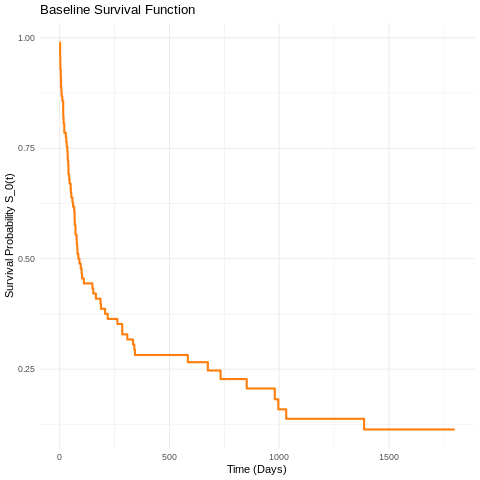

In [ ]:
%%R
# Add survival probability
baseline_hazard$survival <- exp(-baseline_hazard$hazard)

# Plot survival
ggplot(baseline_hazard, aes(x = time, y = survival)) +
  geom_step(color = "#FF7F0E", size = 1) +
  labs(title = "Baseline Survival Function",
       x = "Time (Days)",
       y = "Survival Probability S_0(t)") +
  theme_minimal()

### Cumulative hazard for a specific patient


To estimate the cumulative hazard for a specific patient (e.g., age = mean, surgery = 1, transplant = 1), use the model’s coefficients:


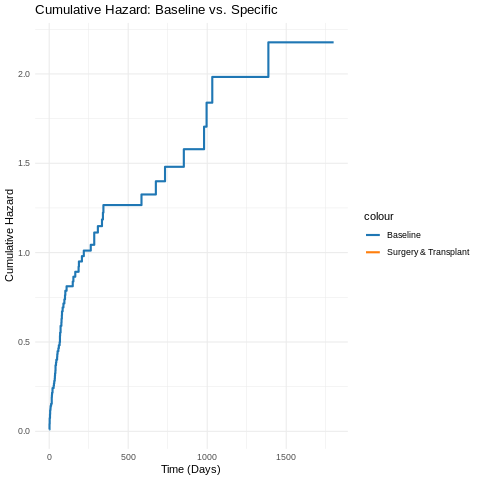

In [ ]:
%%R
# Extract coefficients
coef <- coef(cox_model)

# Hazard for specific covariates: H(t) = H_0(t) * exp(beta_age * age + beta_surgery * surgery + beta_transplant * transplant)
baseline_hazard$hazard_specific <- baseline_hazard$hazard * exp(coef["age"] * 0 + coef["surgery"] * 2 + coef["transplant"] * 2)

# Plot
ggplot(baseline_hazard, aes(x = time)) +
  geom_step(aes(y = hazard, color = "Baseline"), size = 1) +
  geom_step(aes(y = hazard_specific, color = "Surgery & Transplant"), size = 1) +
  labs(title = "Cumulative Hazard: Baseline vs. Specific",
       x = "Time (Days)",
       y = "Cumulative Hazard") +
  scale_color_manual(values = c("Baseline" = "#1F77B4", "Surgery & Transplant" = "#FF7F0E")) +
  theme_minimal()

### Predict Survival for a New Patient


To predict survival for a new patient with specific covariates (e.g., age = mean, surgery = 1, transplant = 1), use the `survfit()` function:


Ignoring unknown labels:
• fill : "Strata"
• linetype : "solid"
Ignoring unknown labels:
• fill : "Strata"
• linetype : "solid"
Ignoring unknown labels:
• fill : "Strata"
• linetype : "solid"
Ignoring unknown labels:
• fill : "Strata"
• linetype : "solid"
Ignoring unknown labels:
• colour : "Strata"


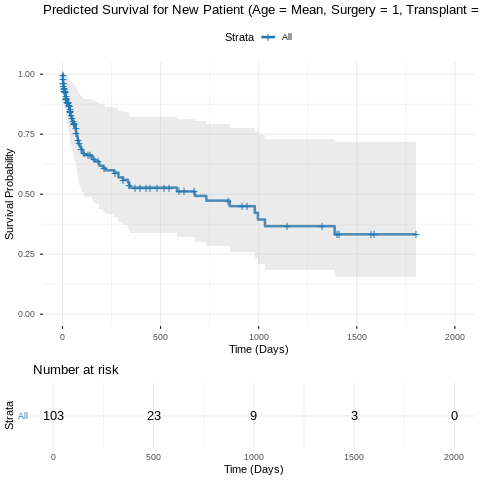

In [ ]:
%%R

# New patient data
new_patient <- data.frame(age = 0, surgery = 1, transplant = 1)

# Predict survival curve for the new patient
surv_pred <- survfit(cox_model, newdata = new_patient)

# Plot survival curve using ggsurvplot
ggsurvplot(
  surv_pred,
  data = new_patient,
  conf.int = TRUE,           # Include confidence intervals
  palette = "#1F77B4",      # Blue color for the curve
  xlab = "Time (Days)",
  ylab = "Survival Probability",
  title = "Predicted Survival for New Patient (Age = Mean, Surgery = 1, Transplant = 1)",
  ggtheme = theme_minimal(), # Clean theme
  risk.table = TRUE,        # Add risk table
  risk.table.height = 0.25, # Adjust table height
  linetype = "solid",       # Solid line for the curve
  size = 1.2                # Line thickness
)

## Summary and Conclusion


The cumulative baseline hazard $ H_0(t) $ is estimated using basehaz() from the fitted Cox model. It’s a step function that increases at event times and forms the basis for predicting hazards for any covariate combination. The heart dataset’s time-dependent structure is handled seamlessly in the Cox model. Use the visualizations to interpret how risk accumulates, and adjust for specific covariates as needed. Time-dependent covariates allow for more realistic modeling of changing risk factors over time, improving the validity and applicability of survival analysis in many fields.



## Resources


1. **Survival Package Vignette: Time-Dependent Covariates**  
   - Official guide on Cox models with time-dependent covariates using the `heart` dataset.  
   - **Link**: `vignette("timedep", package = "survival")` or [CRAN](https://cran.r-project.org/web/packages/survival/vignettes/timedep.pdf).

2. **DataCamp: Survival Analysis in R**  
   - Interactive course covering time-dependent covariates with `survival` package.  
   - **Link**: [DataCamp](https://www.datacamp.com/courses/survival-analysis-in-r).

3. **Paul Lambert’s Tutorial on Flexible Parametric Models**  
   - Advanced guide with R code for time-dependent covariate modeling.  
   - **Link**: [Paul Lambert’s Website](http://www.paullambert.net/).

4. **Applied Survival Analysis Using R (Dirk F. Moore)**  
   - Book with practical R code for time-dependent Cox models.  
   - **Link**: [Springer](https://www.springer.com/gp/book/9783319312439).

5. **R for Health Data Science (Survival Chapter)**  
   - Free book chapter on survival analysis with time-varying covariates.  
   - **Link**: [R for Health Data Science](https://argoshare.is.ed.ac.uk/healthyr_book/).